# Додаткові завдання №2

## 1 Візуалізація емпіричної імовірності
Побудуйте графік залежності емпіричної імовірності випадіння герба (HEAD) від кількості підкидань чесної монети (симуляцій).

**Зауваження.** Завдання передбачає використання бібліотеки [Matplotlib](https://matplotlib.org/).

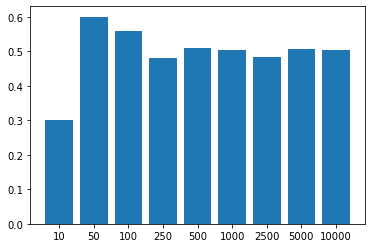

In [2]:
# Місце для Вашого коду
import numpy as np
import matplotlib.pyplot as plt

coin = ["H","T"]
probs = [0.5, 0.5]
n = [10, 50, 100, 250, 500, 1000, 2500, 5000, 10000]
probability = []

for i in n:
    tosses = np.random.choice(coin, p=probs, size=i)
    heads = list(tosses).count("H")
    prob = float(heads / i)
    probability.append(prob)

x = np.arange(len(n))
plt.bar(x, probability)
plt.xticks(x, n)
plt.show()


## 2 Найбільше число
Реалізуйте функцію підрахунку точної (теоретичної) імовірності того, що максимальне число після $n$ кидків різних гральних кубиків із кількістю сторін $f = \{ f_i \}_{i = 1}^{n}$ дорівнює $x\_max$, для таких параметрів:
- $f = \{ 2, 5, 8 \}, x\_max = 8$
- $f = \{ 3, 4 \}, x\_max = 2$
- $f = \{ 2, 5, 7, 3 \}, x\_max = 3$

Тобто, якщо $X_i, i = 1, \ldots, n$, - число на $i$-му кидку кубика, а $X = \max\limits_{1 \leq i \leq n} X_i$, то потрібно знайти ймовірність $\textbf{P} \left( X = x\_max \right)$.

Підрахуйте також емпіричні ймовірності відповідних подій у випадку $10000$ симуляцій.

**Зауваження.** Якщо введені параметри не мають сенсу, то повертати $0$.
Наприклад, якщо при $f = \{ 4, 8, 3 \}$ вводиться $x\_max < 1$ або $x\_max > 8$.

In [8]:
# Місце для Вашого коду
import numpy as np
import itertools
N = 10000

values = [[range(1, 3), range(1, 6), range(1, 9)],
          [range(1, 4), range(1, 5)],
          [range(1, 3), range(1, 6), range(1, 8), range(1, 4)]]

pairs = [[values[0], 8, 8], [values[1], 2, 4], [values[2], 3, 7]]

def probability(n,x_max, value):
    lst = list(itertools.product(*value))
    a = []
    print('n = {}, x_max = {}'.format(len(value), x_max))
    for x in lst:
        if max(x) == x_max:
            a.append(x)

    return (len(a) / len(lst))

for value, x_max, a in pairs:
    if x_max >= 1 and x_max <= a:
        print('Theoretical:', probability(1, x_max, value))

        b = []

        for i in range(N):
            max_value = 0

            for val in value:
                max_value = max(np.random.choice(val, size=1), max_value)

            b.append(max_value)

        print('Empirical:', (b.count(x_max) / N))
    else:
        print(0)


n = 3, x_max = 8
Theoretical: 0.125
Empirical: 0.1253
n = 2, x_max = 2
Theoretical: 0.25
Empirical: 0.2444
n = 4, x_max = 3
Theoretical: 0.18095238095238095
Empirical: 0.1881


## 3 Сума чисел
Реалізуйте функцію підрахунку точної (теоретичної) імовірності того, що сума чисел після $n$ кидків різних гральних кубиків із кількістю сторін $f = \{ f_i \}_{i = 1}^{n}$ дорівнює $s$, для таких параметрів:
- $f = \{ 3, 4, 5 \}, s = 13$
- $f = \{ 2, 2 \}, s = 3$
- $f = \{ 3, 4, 5 \}, s = 7$

Тобто, якщо $X_i, i = 1, \ldots, n$, - число на $i$-му кидку кубика, а $X = \sum\limits_{i = 1}^{n} X_i$, то потрібно знайти ймовірність $\textbf{P} \left( X = s \right)$.

Підрахуйте також емпіричні ймовірності відповідних подій у випадку $10000$ симуляцій.

**Зауваження.** Якщо введені параметри не мають сенсу, то повертати $0$.
Наприклад, якщо при $f = \{ 4, 6, 3 \}$ вводиться $s < 3$ або $s > 13$.

In [6]:
import numpy as np
import itertools
N = 10000

values = [[range(1, 4), range(1, 5), range(1, 6)],
          [range(1, 3), range(1, 3)],
          [range(1, 4), range(1, 5), range(1, 6)]]

pairs = [[values[0], 13, 3, 12], [values[1], 3, 2, 4], [values[2], 7, 3, 12]]

def probability(n, s, value):
    lst = list(itertools.product(*value))
    a = []
    print('n = {}, s = {}'.format(len(value), s))
    for x in lst:
        if sum(x) == s:
            a.append(x)

    return (len(a) / len(lst))

for value,s,a,b in pairs:
    if s >= a and s <= b:
        print('Theoretical:',probability(1,s, value))

        b = []

        for i in range(N):
            suma = 0

            for val in value:
                suma += np.random.choice(val, size=1)

            b.append(suma)

        print('Empirical:', (b.count(s)/N))
    else:
        print(0)


0
n = 2, s = 3
Theoretical: 0.5
Empirical: 0.4958
n = 3, s = 7
Theoretical: 0.18333333333333332
Empirical: 0.1895
